# INFO 7390 Assignment - 1
## Zihan Wan

In [1]:
# Module imports
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Data input
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,BP
0,70,130
1,67,115
2,57,124
3,64,128
4,74,120


In [4]:
# No missing values
df.describe()

,Age,BP
count,270.000000,270.000000
mean,54.433333,131.344444
std,9.109067,17.861608
min,29.000000,94.000000
25%,48.000000,120.000000
50%,55.000000,130.000000
75%,61.000000,140.000000
max,77.000000,200.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

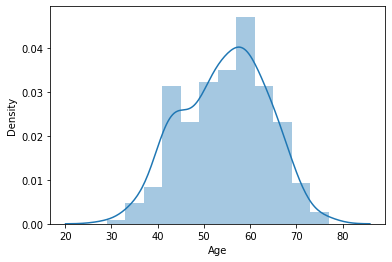

In [5]:
# Not skewed
sns.distplot(df['Age'])

<AxesSubplot:xlabel='BP', ylabel='Density'>

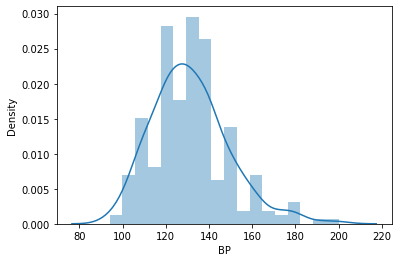

In [6]:
# Not skewed
sns.distplot(df['BP'])

In [7]:
# Standardize data
scaler = StandardScaler() 
scaler.fit(df)
df2 = pd.DataFrame(scaler.transform(df))
df2.columns = df.columns
df2.describe()

,Age,BP
count,2.700000e+02,2.700000e+02
mean,3.667848e-16,5.723816e-16
std,1.001857e+00,1.001857e+00
min,-2.797275e+00,-2.094649e+00
25%,-7.075676e-01,-6.363095e-01
50%,6.232461e-02,-7.540984e-02
75%,7.222322e-01,4.854898e-01
max,2.481986e+00,3.850888e+00


In [8]:
# View processed data
df2

,Age,BP
0,1.712094,-0.075410
1,1.382140,-0.916759
2,0.282294,-0.411950
3,1.052186,-0.187590
4,2.152032,-0.636310
...,...,...
265,-0.267629,2.280369
266,-1.147506,-0.636310
267,0.172309,0.485490
268,0.282294,0.485490


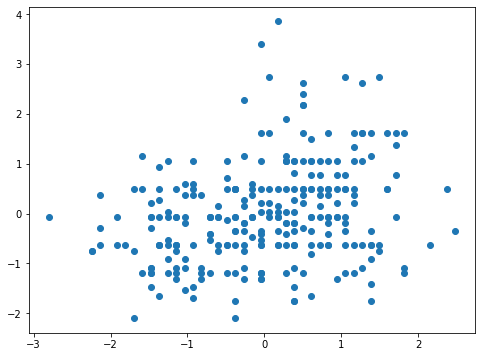

In [9]:
# Draw a scatter plot
X=df2.values
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1])

In [10]:
# Define k and initiate the centroids
def initiate_centroids(k, dset):
    centroids = dset.sample(k)
    return centroids

In [11]:
# Calculate the root of square errors
def rsserr(a,b):
    return np.square(np.sum((a-b)**2)) 

In [12]:
# Assign the data points to corresponding centroids
def centroid_assignation(dset, centroids):
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [13]:
# Implement K-means algorithm
def kmeans(dset, k=2, tol=1e-4):

    # Make a copy
    working_dset = dset.copy()
    # Define some variables to hold the error
    err = []
    # Define the stopping signal and a counter for the iterations
    goahead = True
    j = 0
    
    # Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [14]:
# Testing it out on df2 - set k=3
df2['centroid'], df2['error'], centroids =  kmeans(df2[['Age','BP']], 3)
df2.head()

,Age,BP,centroid,error
0,1.712094,-0.075410,2,0.923140
1,1.382140,-0.916759,2,0.669597
2,0.282294,-0.411950,2,0.057764
3,1.052186,-0.187590,2,0.009449
4,2.152032,-0.636310,2,4.400625


In [15]:
# Cluster of each point
df2['centroid'] = kmeans(df2[['Age','BP']], 3)[0]
df2['centroid'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0,
       2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2,
       0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 2,
       1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 0], dtype=int64)

In [16]:
# Centroid of each cluster
centroids

,Age,BP
0,0.713433,1.545590
1,-0.937877,-0.422976
2,0.719029,-0.269819


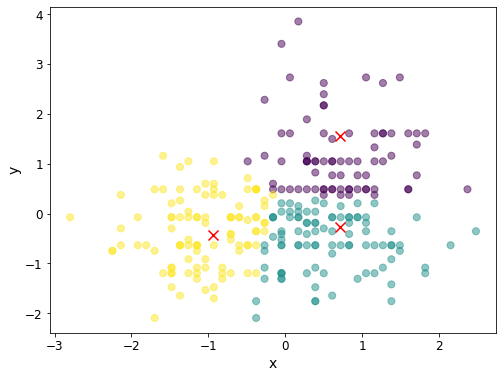

In [17]:
# Visualization of clusters
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df2.iloc[:,0], df2.iloc[:,1],  marker = 'o', 
            c=df2['centroid'].astype('category'), 
            s=50, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 'x', s=100, c='red')
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

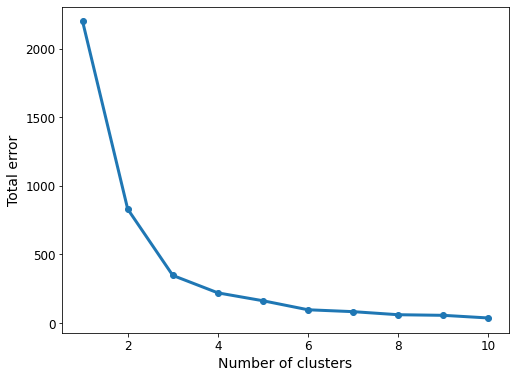

In [18]:
# Elbow method - find the optimal k
err_total = []
n = 10
for i in range(n):
    _, my_errs, _ = kmeans(df2[['Age','BP']], i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# The 'elbow' is located between 2 and 4 clusters

For n_clusters = 2 The average silhouette_score is : 0.3703683803049772


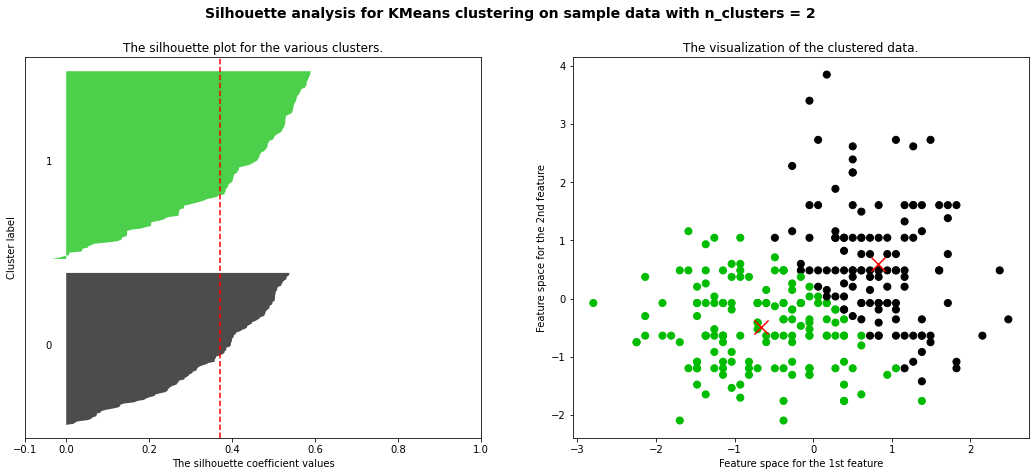

For n_clusters = 3 The average silhouette_score is : 0.3641486312833792


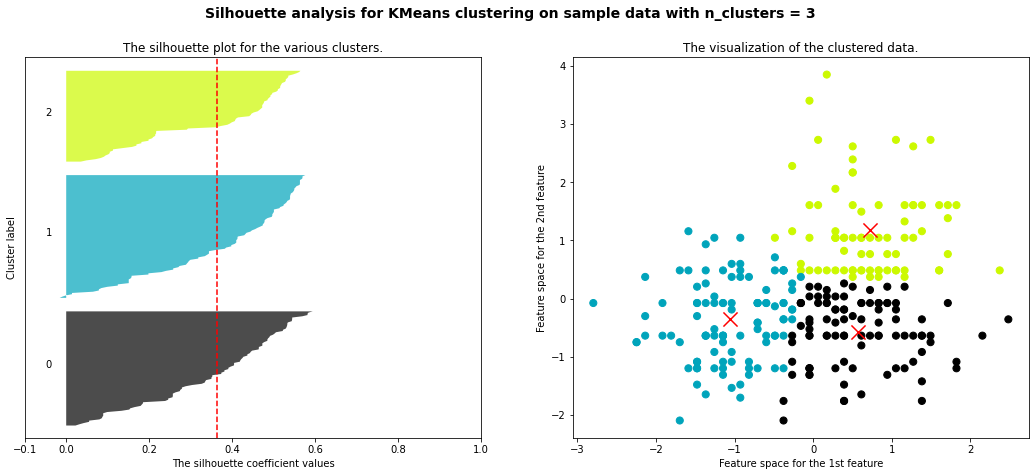

For n_clusters = 4 The average silhouette_score is : 0.3198191197375435


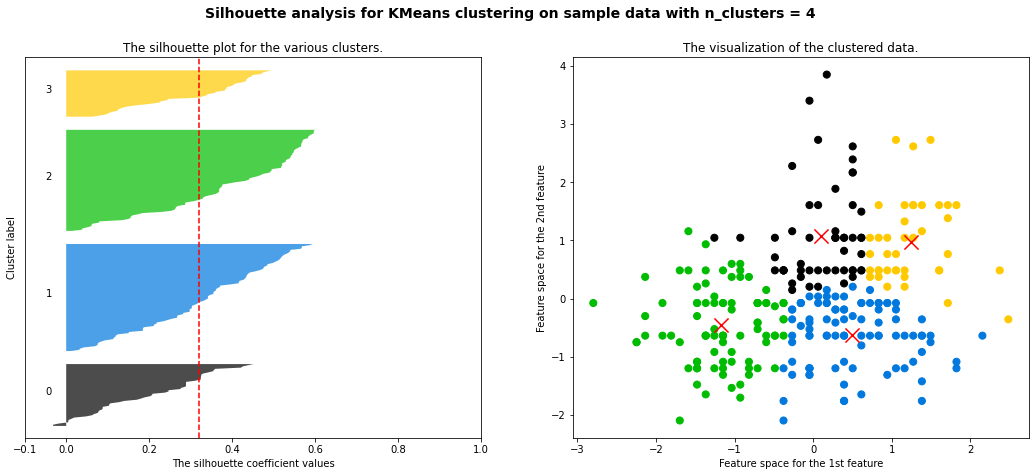

For n_clusters = 5 The average silhouette_score is : 0.33625846586194796


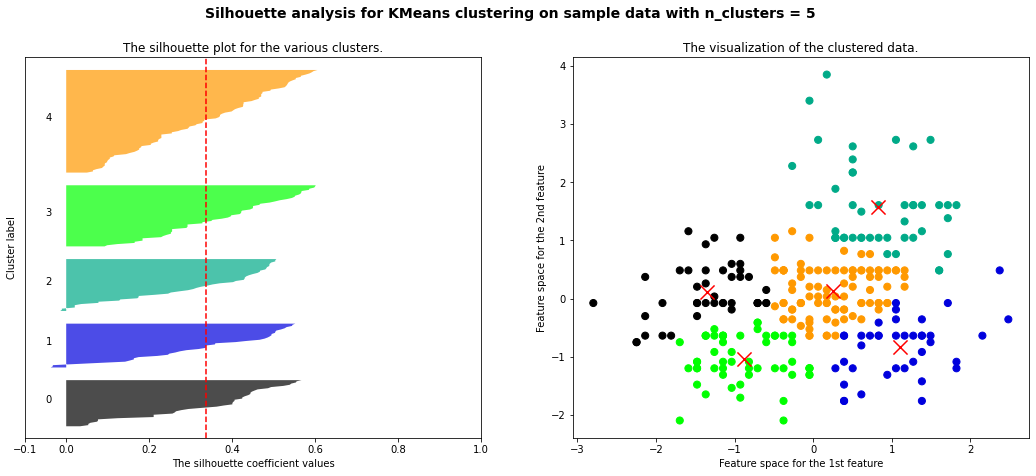

For n_clusters = 6 The average silhouette_score is : 0.3265144729884788


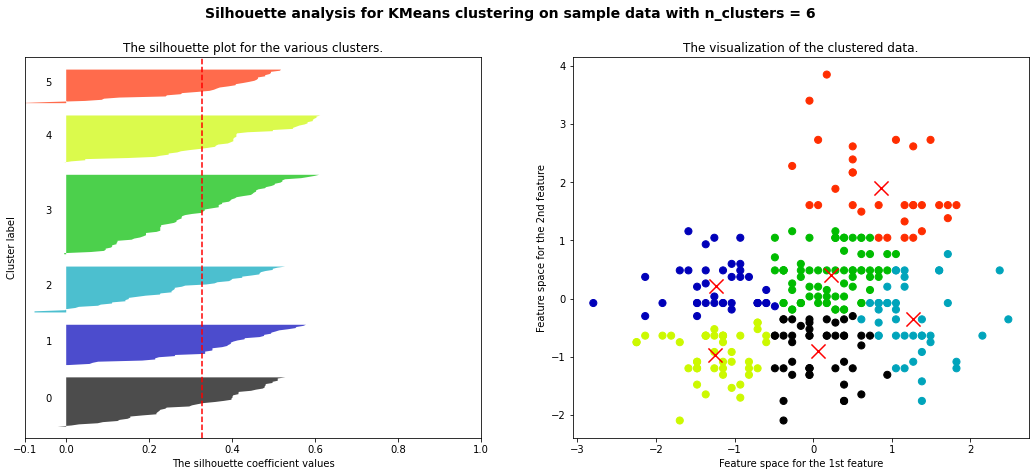

In [19]:
# Silhoutte method - find the optimal k
for n_clusters in [2,3,4,5,6]: 
    n_clusters = n_clusters 
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    fig.set_size_inches(18, 7) 
    
    # Desired silhouett coefficient values between 0 and 1
    ax1.set_xlim([-0.1, 1]) 
    # Set y-axis interval
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10]) 
    
    # Implement K-means algorithm    
    clusterer = kmeans(df2[['Age','BP']], n_clusters)
    
    # Get the cluster value of each point
    cluster_labels = clusterer[0].values
    
    # Get silhouett coefficient values
    silhouette_avg = silhouette_score(X, cluster_labels) 
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) 
    sample_silhouette_values = silhouette_samples(X, cluster_labels) 
    
    y_lower = 10 
    # Loop for each cluster
    for i in range(n_clusters): 
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] 
        ith_cluster_silhouette_values.sort() 
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i)/n_clusters) 
        ax1.fill_betweenx(np.arange(y_lower, y_upper) 
                          ,ith_cluster_silhouette_values 
                          ,facecolor=color 
                          ,alpha=0.7)
        ax1.text(-0.05 
                 , y_lower + 0.5 * size_cluster_i 
                 , str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.") 
    ax1.set_xlabel("The silhouette coefficient values") 
    ax1.set_ylabel("Cluster label") 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) 
    
    ax2.scatter(X[:,0], X[:,1]
                ,marker='o' 
                ,s=50 
                ,c=colors)
    centers = clusterer[2].values

    # Visualization of clusters 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x'
                , c="red", alpha=1, s=200)
    ax2.set_title("The visualization of the clustered data.") 
    ax2.set_xlabel("Feature space for the 1st feature") 
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    
# Optimal k is 2 or 3